# Visualizing Dimensional Reduction using t-SNE

## Overview
In this post, I will apply t-SNE to visualize high-dimensional datasets in Python.

## Introduction
t-SNE (t-distributed Stochastic Neighbor Embedding) is a method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. As same as PCA (Principal Component Analysis), t-SNE is an unsupervised machine learning algorithm. PCA is a linear dimensionality reduction algorithm, while t-SNE is a non-linear dimensionality reduction algorithm. Yet, both of them can be used for exploring high-dimensional data since they can represent high-dimensional data correctly in lower dimensions.

## Dataset Overview
"fashion-minst" is a dataset of Zalando's article images, consisting of 10,000 examples. Each example is a 28x28 grayscale image associated with a label from 10 classes. To be more specific, each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. The pixel-value is an integer between 0 and 255. Overall, there are 785 columns in the dataset, where the first column recorded the class labels, and the rest of the columns contained the pixel-values of the associated image.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

In [2]:
# Import data
df = pd.read_csv('fashion-mnist.csv')
df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Analysis

### Change Lable Name Using Dictionary

In [3]:
# Refer labels to the following dictionary
label_dict = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', \
              6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

# Change label name using label_dict
df_with_product_name = df.replace({"label": label_dict})

### Plot Images

In [4]:
# Pixels
X = df_with_product_name[list(df.columns)[1:]].values

# Labels
y = df_with_product_name['label'].values

# Rescale from 0 to 1
X = X / 255.0

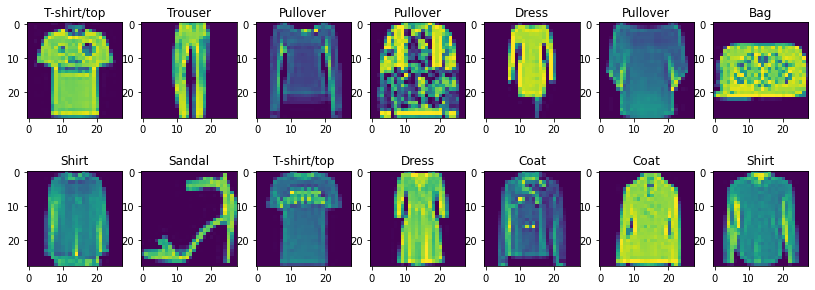

In [5]:
plt.figure(figsize=(14, 5))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(X[i].reshape((28,28)))
    plt.title(y[i])
plt.show()

### Bar Chart of Label
To view the distribution of label, I generated a bar chart for the column 'label'.

Text(0.5, 1.0, 'Bar Chart of Fashion Product')

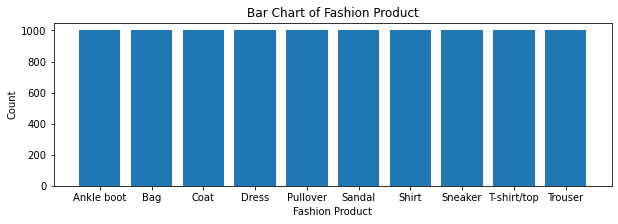

In [6]:
# Group by label
fashion = df_with_product_name.groupby(['label']).size().reset_index()
fashion.columns.values[1] = 'Count'

# Create Bar cahrt
plt.figure(figsize=(10,3))
plt.bar(fashion['label'], fashion['Count']) # X=label, Y=Count
plt.xlabel("Fashion Product")
plt.ylabel("Count")
plt.title("Bar Chart of Fashion Product")

From the chart above, we can tell that there are 10 kinds of fashion products, each with the same count, 1000.

### Visualize Dimensional Reduction
First of all, instead of using the whole dataset, I generated a subset of data with 100 random samples for each fashion product. <br />

In [7]:
# 1. Generate a subset of data with 100 random samples for each fashion product
fashion_random = df.groupby('label').apply(lambda s: s.sample(100, random_state=2021))

# Delete index and reset
fashion_random.reset_index(drop=True, inplace=True)
fashion_random.shape

(1000, 785)

Then, I used t-SNE from sklearn to reduce the dimension of the data down to 2.<br />

In [8]:
# Use t-SNE to reduce the dimension of the data down to 2
tsne = TSNE(n_components=2, random_state=0)

# Assign columns 
a = fashion_random.shape[1]
feat_cols = [ 'pixel'+str(i) for i in range(1, a) ]
x = fashion_random[feat_cols].values
print("Before reducing dimension, the dataset has {} dimensions.".format(x.shape[1]))

# Transform with a t-SNE
X_2d = tsne.fit_transform(x)
print("After reducing dimension, the dataset has only {} dimensions.".format(X_2d.shape[1]))

Before reducing dimension, the dataset has 784 dimensions.
After reducing dimension, the dataset has only 2 dimensions.


Finally, I generate a plot to visualize the dimension-reduced dataset. Note that instead of using dots, I used the number of the fashion product in the plot. Also, I used different colors for different fashion products. 

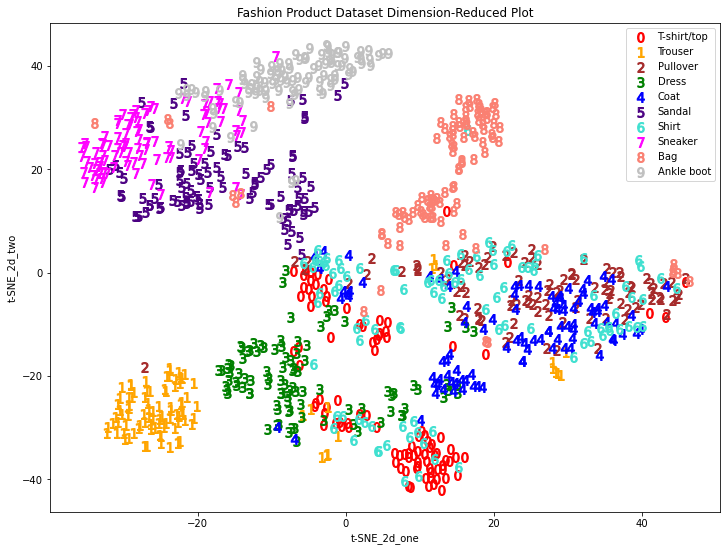

In [9]:
# Generate a plot to visualize the dimension-reduced dataset
fashion_random['2d_one'] = X_2d[:,0] # X
fashion_random['2d_two'] = X_2d[:,1] # Y

plt.figure(figsize=(12, 9))

# Use different colors for different fashion products
colors = 'r', 'orange', 'brown', 'g', 'b', 'indigo', 'turquoise', 'magenta', 'salmon', 'silver'
names = np.unique(fashion_random['label'])
ranges = range(len(names))

for i, c, label in zip(ranges, colors, names):
    plt.scatter(fashion_random.loc[fashion_random['label'] == i, '2d_one'], 
                fashion_random.loc[fashion_random['label'] == i, '2d_two'], c=c, label=label_dict[i], 
                marker =r"$ {} $".format(names[i]), s=100)
plt.xlabel("t-SNE_2d_one")
plt.ylabel("t-SNE_2d_two")
plt.title("Fashion Product Dataset Dimension-Reduced Plot")
plt.legend()
plt.show()

### Observation
From the graph above, we can tell that in the lower left, fashion product '1' (Trouser) is concentrated, and in the upper left, there is fashion product '7' (Sneaker), '5' (Sandal), and '9' (Ankle boot), which are all shoes. Fashion product '3' (Dress) and '8' (Bag) are also quite concentrated. However, fashion product '0' (T-shirt/top) is less concentrated, and '2' (Pullover), '4' (Coat), and '6' (Shirt) are scattered and overlapped each other. Overall, the plot displayed clusters.

## References
Derksen, L. (2016, October 29). <I>Visualising high-dimensional datasets using PCA and t-SNE in Python</I>. Retrieved from https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b <br />
t-distributed stochastic neighbor embedding. Retrieved from https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding